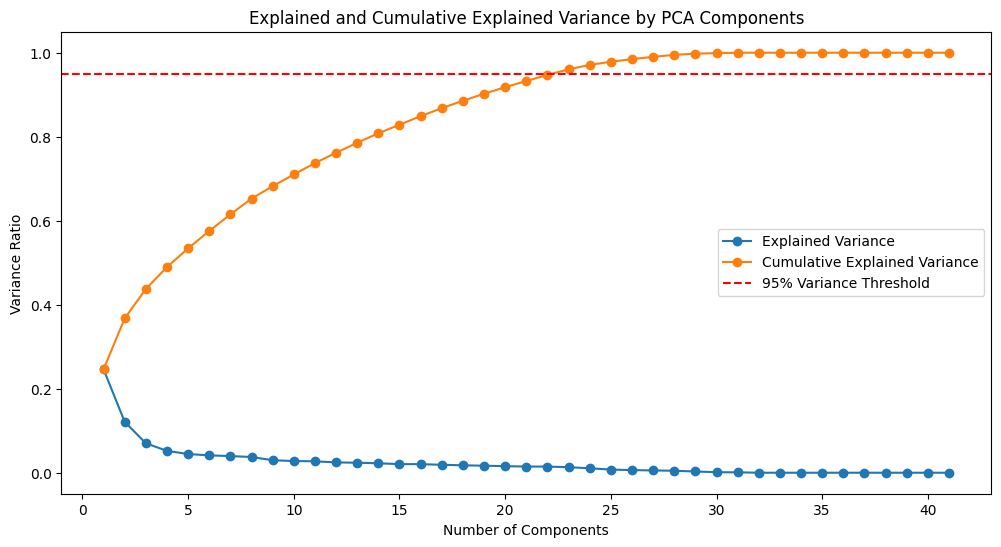

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('../../outputs/Assignment_3/extracted_features_data.csv')
test_data = pd.read_csv('../../outputs/Assignment_3/extracted_features_data.csv')

# Separate the features and target variable
x_train = data.drop(columns=['Target'])
y_train = data['Target']
x_test = test_data.drop(columns=['Target'])
y_test = test_data['Target']

# Standardize the features before applying PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# Step 1: Apply PCA to analyze explained variance
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_scaled)

# Step 2: Determine "smart" number of components based on penalized score approach
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(12, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', label='Explained Variance')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', label='Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label="95% Variance Threshold")
plt.xlabel('Number of Components')
plt.ylabel('Variance Ratio')
plt.title('Explained and Cumulative Explained Variance by PCA Components')
plt.legend()
plt.show()



Smart ratio chosen components: 30


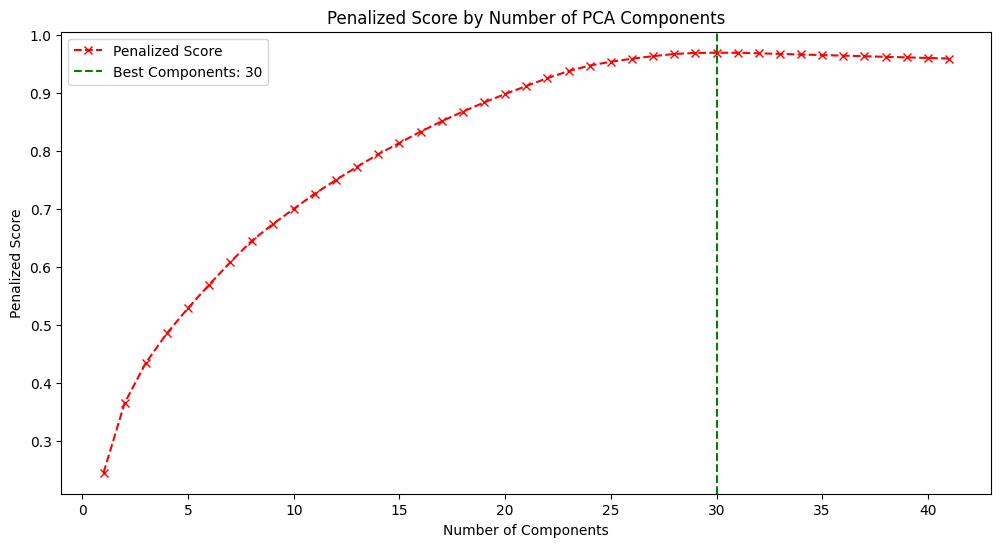

In [11]:
penalty_factor = 0.001  # Tweak this as needed
component_scores = cumulative_variance - penalty_factor * np.arange(1, len(cumulative_variance) + 1)
best_n_components = np.argmax(component_scores) + 1
print(f"Smart ratio chosen components: {best_n_components}")

plt.figure(figsize=(12, 6))
plt.plot(range(1, len(component_scores) + 1), component_scores, marker='x', color='r', linestyle='--', label="Penalized Score")
plt.axvline(x=best_n_components, color='g', linestyle='--', label=f"Best Components: {best_n_components}")
plt.xlabel('Number of Components')
plt.ylabel('Penalized Score')
plt.title('Penalized Score by Number of PCA Components')
plt.legend()
plt.show()

In [12]:
# Step 3: Apply PCA with optimal number of components
pca_smart = PCA(n_components=best_n_components)
X_train_pca_smart = pca_smart.fit_transform(X_train_scaled)
X_test_pca_smart = pca_smart.transform(X_test_scaled)

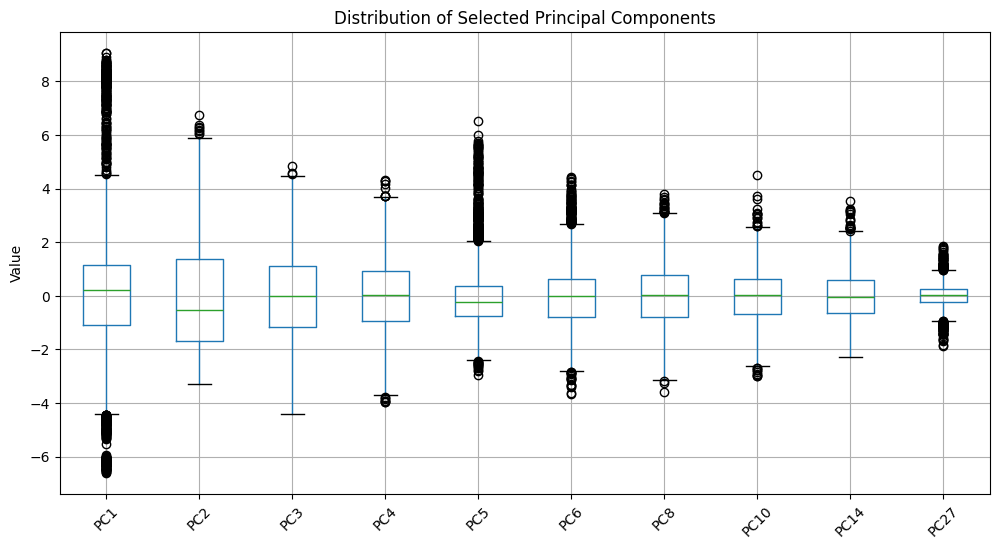

Final selected feature data saved to ../../outputs/Assignment_3/final_selected_features_data.csv.


In [13]:
# Step 4: Apply SelectKBest on PCA-transformed data
k = 10  # Number of features to select; adjust as needed
selector = SelectKBest(score_func=f_classif, k=k)
selector.fit(X_train_pca_smart, y_train)

# Transform both the training and test sets based on selected PCA components
X_train_selected = selector.transform(X_train_pca_smart)
X_test_selected = selector.transform(X_test_pca_smart)

# Step 5: Save the final transformed and selected features into a DataFrame and output file
selected_components = [f'PC{i+1}' for i in range(best_n_components) if selector.get_support()[i]]
x_train_selected_df = pd.DataFrame(X_train_selected, columns=selected_components)

plt.figure(figsize=(12, 6))
x_train_selected_df.boxplot()
plt.title('Distribution of Selected Principal Components')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

x_train_selected_df['Target'] = y_train.reset_index(drop=True)


# Save the final combined features to CSV
final_output_path = '../../outputs/Assignment_3/final_selected_features_data.csv'
x_train_selected_df.to_csv(final_output_path, index=False)
print(f"Final selected feature data saved to {final_output_path}.")
